## RECOGNIZING HANDWRITTEN DIGITS USING TENSORFLOW

# Installing tensorflow

In [1]:
!pip install tensorflow



# Import necessary libraries:

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


# Load and preprocess the MNIST dataset:

In [3]:

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


# Build a simple convolutional neural network (CNN) model:

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


# Compile and train the model:

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 10s 11ms/step - loss: 0.1839 - accuracy: 0.9452 - val_loss: 0.0546 - val_accuracy: 0.9831
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 3/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0390 - val_accuracy: 0.9866
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0263 - val_accuracy: 0.9909
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0272 - val_accuracy: 0.9915


# Evaluate the model:

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')



313/313 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9915
Test accuracy: 0.9915000200271606


# Make predictions:

In [7]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


# Import library for visualising prediction

In [8]:
import matplotlib.pyplot as plt

# Testing 

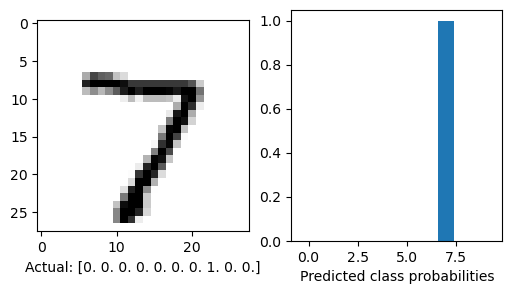

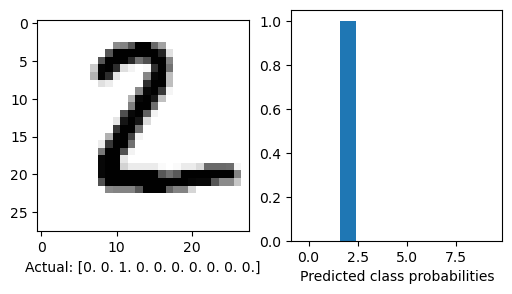

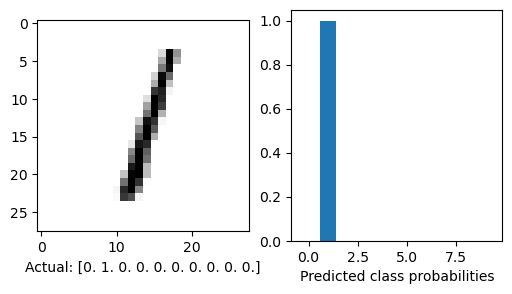

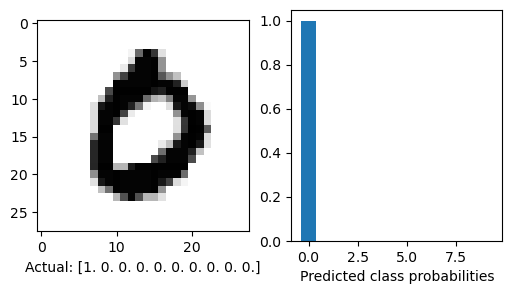

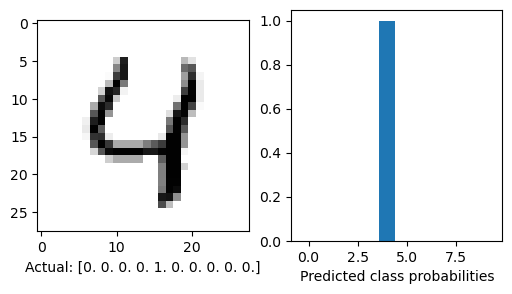

In [9]:
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.figure(figsize=(6, 3))
    
    plt.subplot(1, 2, 1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {test_labels[i]}')
    
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[i])
    plt.xlabel('Predicted class probabilities')
    
    plt.show()